In [1]:
'''Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import qgrid
%matplotlib inline
sns.set()
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys()) #ключи дэйтасета

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


C:\pyth_soft\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

In [2]:
'''Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
'''
from sklearn.model_selection import train_test_split
X = pd.DataFrame(boston.data, columns = boston.feature_names)
Y = pd.DataFrame(boston.target, columns= ['price',])
X.info()
Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y, test_size=0.2, random_state = 42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


C:\pyth_soft\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Размерность массива тренировочных данных => (404, 13)
Размерность дмассива с пониженной разменойстью  => (404, 2)


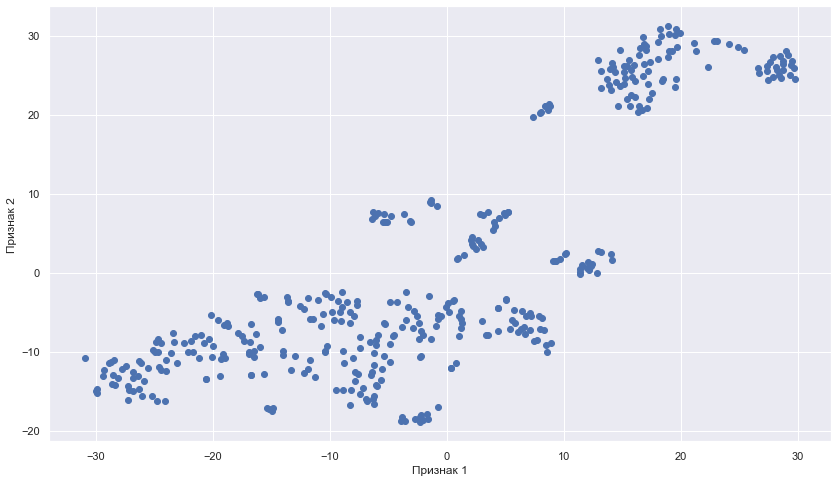

In [3]:
'''Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.
'''
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from pylab import rcParams
plt.rcParams['figure.figsize']=(14,8)
scaler = StandardScaler()
Xtrain_scaled = pd.DataFrame(scaler.fit_transform(Xtrain), columns=Xtrain.columns)
Xtest_scaled = pd.DataFrame(scaler.transform(Xtest), columns=Xtest.columns)
model = TSNE(n_components=2, learning_rate=250, random_state=42)
Xtrain_m=model.fit_transform(Xtrain_scaled)
print(f'Размерность массива тренировочных данных => {Xtrain_scaled.shape}')
print(f'Размерность дмассива с пониженной разменойстью  => {Xtrain_m.shape}')

plt.scatter(Xtrain_m[:,0], Xtrain_m[:,1])
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

In [4]:
'''С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
'''
from sklearn.cluster import KMeans
k_model = KMeans(n_clusters=3, max_iter=100, random_state=42)
cluster_label = k_model.fit_predict(Xtrain_scaled)

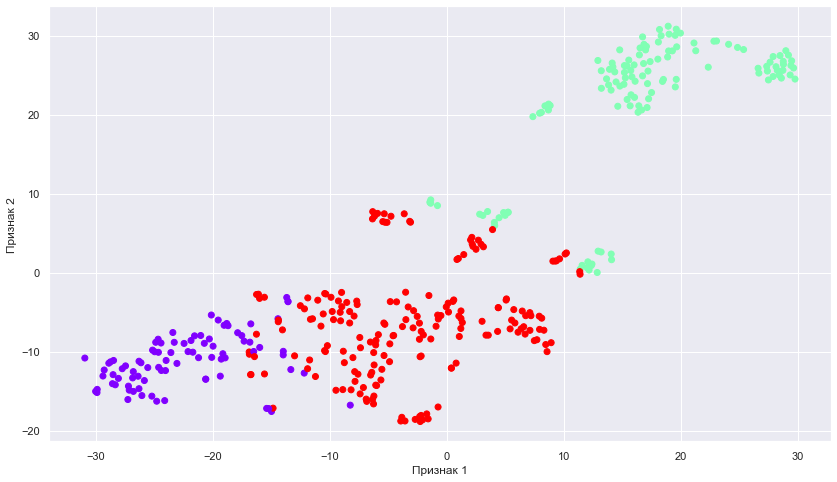

Тренировочный набор. 
 _________________
Среднее значение цены для кластера 1 => 27.788372093023252 
Среднее значение CRIM для кластера 1 => 0.07356558139534886 
Среднее значение цены для кластера 2 => 16.165354330708666 
Среднее значение CRIM для кластера 2 => 10.797028425196853 
Среднее значение цены для кластера 3 => 24.958115183246072 
Среднее значение CRIM для кластера 3 => 0.42166020942408367 


In [5]:
'''Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.
'''
plt.scatter(Xtrain_m[:,0], Xtrain_m[:,1], c= cluster_label, cmap='rainbow')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()
y_train_mean0 = ytrain[cluster_label ==0].mean()
y_train_mean1 = ytrain[cluster_label ==1].mean()
y_train_mean2 = ytrain[cluster_label ==2].mean()
CRIM_mean0 = Xtrain.loc[cluster_label ==0, 'CRIM'].mean()
CRIM_mean1 = Xtrain.loc[cluster_label ==1, 'CRIM'].mean()
CRIM_mean2 = Xtrain.loc[cluster_label ==2, 'CRIM'].mean()
print('Тренировочный набор. \n _________________')
print(f'Среднее значение цены для кластера 1 => {y_train_mean0[0] } \nСреднее значение CRIM для кластера 1 => {CRIM_mean0} ')
print(f'Среднее значение цены для кластера 2 => {y_train_mean1[0] } \nСреднее значение CRIM для кластера 2 => {CRIM_mean1} ')
print(f'Среднее значение цены для кластера 3 => {y_train_mean2[0] } \nСреднее значение CRIM для кластера 3 => {CRIM_mean2} ')





Можно сделать очевидный вывод, что уровень преступности имеет высокую корреляцию с ценой квартиры - чем <br>
выше уровень преступности ( кластер 2), тем цена ниже.